Good day my friends and I would say a warm welcome to all of you guys!

In this notebook, I will perform a cleaning session of this (kinda) messy dataset about Aircrash Investigation (the detail of the dataset can be found on [kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses?datasetId=521). There are a lot of columns here such as the crash date, engine type, location of the crash, number of injuries, report, weather condition, etc. I will perform a very basic and general dataset cleaning process to give a view to the reader of how the cleaning process of the dataset is performed. In a simple words, we clean the data before we use it so that we can utilise the data maximally, without any missing values or ambiguous data.

In [1]:
#Let's import important libraries first before we work with our data
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
%matplotlib inline

In [2]:
#Read the csv data
plane = pd.read_csv("AviationData.csv",sep=",", encoding='cp1252', low_memory=False)
plane

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,20211223104439,Accident,GAA22WA054,2021-12-21,"Auxerre, OF",United States,475047N,0032948W,NaN,NaN,...,Unknown,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87278,20211228104450,Accident,WPR22LA069,2021-12-22,"Auburn, CA",United States,NaN,NaN,NaN,NaN,...,Positioning,"Fox Two, LLC",0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
87279,20211227104443,Accident,CEN22FA082,2021-12-26,"Hardy, AR",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87280,20211230104454,Accident,ERA22LA097,2021-12-29,"Marathon, FL",United States,NaN,NaN,NaN,NaN,...,NaN,ExecAir,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN


Alright, let's start.

First thing that I usually do:
1. Check the NaN values
2. Determine what should I do with the NaN values (can be either re-labelled or drop). I will drop THE ENTIRE COLUMN if the NaN values are pretty big (approx. >40%) or I just drop those particular NaN values if it is a numeric data/insignificant (approx. <10-20%) if it is a categorical data. I will re-labelled the data if it is significant (may have contribution to the dataset) for a categorical dataset. [Note: For numeric data, NO MATTER HOW SIGNIFICANT IT IS (that is, still approx. <40%), I would personally drop it because we want the numeric data to be full numeric. This is useful so that we don't get error when we perform a numeric data analysis or visualization. However, analyst intuition are required to know whether these NaN values come because the value is zero or they were not recorded].
3. Skim through the data to re-labelled some data that are similar (e.g. 'UNK', 'Unknown', 'Unkown', and 'UNKNOWN') and that are categorical (e.g. 'Yes' becomes '1' and 'No' becomes '0'). The reason for this is to make the data easier more generalized and avoid false positive at the exploratory analysis later.
4. Parsing date time

Personally, the cleaned data should be >40% than the original data. This is to ensure that the data is not biased towards certain aspects. The percentage maybe low, but "A good data doesn't mean that

We focus on cleaning the data in general first before we clean into further cleaning that may be required from the question (e.g. if the question asks us to search the accident only in the United States, we may have to filter the 'Country' and 'Location' column, etc.)

Let's go ahead to the step 1: check the NaN values of the data ad calculate the percentage

In [3]:
u = plane.isnull().sum() #Calculate NaN values at each columns
percentage_missing = u*100/plane.shape[0] #Calculat NaN percentage at each columns
rows_missing = u
percentage_missing_df = pd.DataFrame({'Missing Percentage (%)': percentage_missing, 'Rows Missing' : rows_missing}) #Frame it into dataframe for convenience

We can make heatmap to visualize our NaN values an their locations. It maybe unnecessary, but I prefer to use it sometimes to have a clearer visualization about the NaN values

<AxesSubplot:>

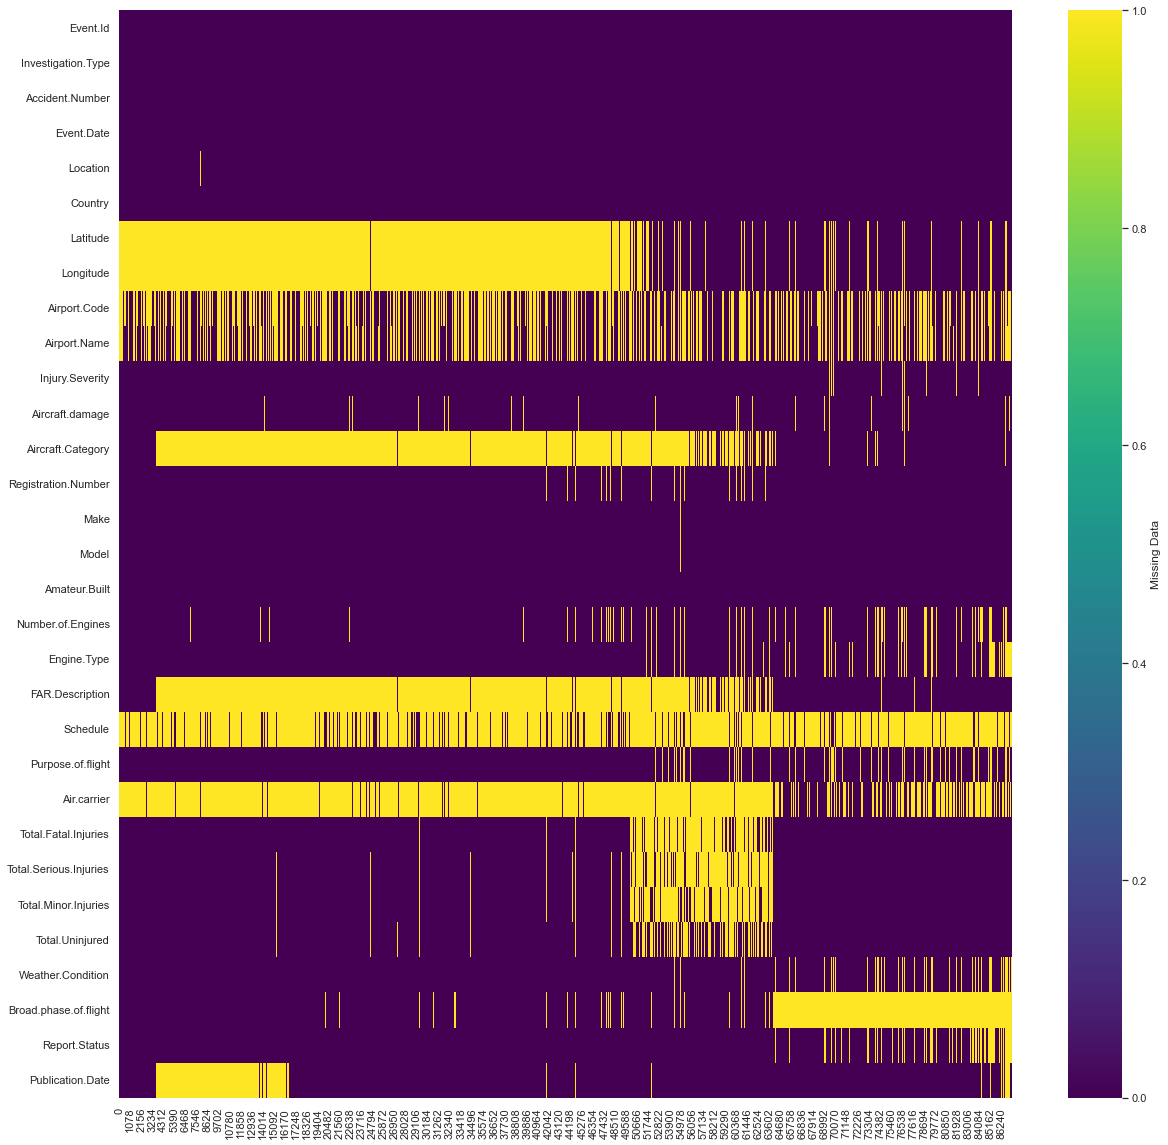

In [4]:
plt.figure(figsize=(20,20))
sb.heatmap(plane.isna().transpose(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})

We can look that the yellow part of the heatmap is the NaN values one. It seems there are lots of them. But no worries, we will work on that until it's all cleaned. First of all, I would like to drop the columns that have >50% NaN values. This is because even though they may have important meaning to the data, it wouldn't help much for us in general since there are lots of unusable data. It is better to drop the entire column than removing the index because it will greatly reduce our dataset, creating a more biased view.

In [5]:
columns_to_drop_1st_session = list(percentage_missing_df[percentage_missing_df["Missing Percentage (%)"] > 50].index)

Let's see which columns that more than half of it is only NaN values:

In [6]:
columns_to_drop_1st_session

['Latitude',
 'Longitude',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

Let's drop it. Remember to put axis=1 for indicating that we want to the entire column (default = rows) and inplace=True (REMEMBER TO ALWAYS DO THIS IF YOU WANT TO MAKE A PERMANENT CHANGE TO THE DATA. PLEASE BE CAREFUL WITH THIS 'INPLACE')

In [7]:
plane.drop(columns = columns_to_drop_1st_session, axis=1, inplace=True)

Let's check the heatmap again

<AxesSubplot:>

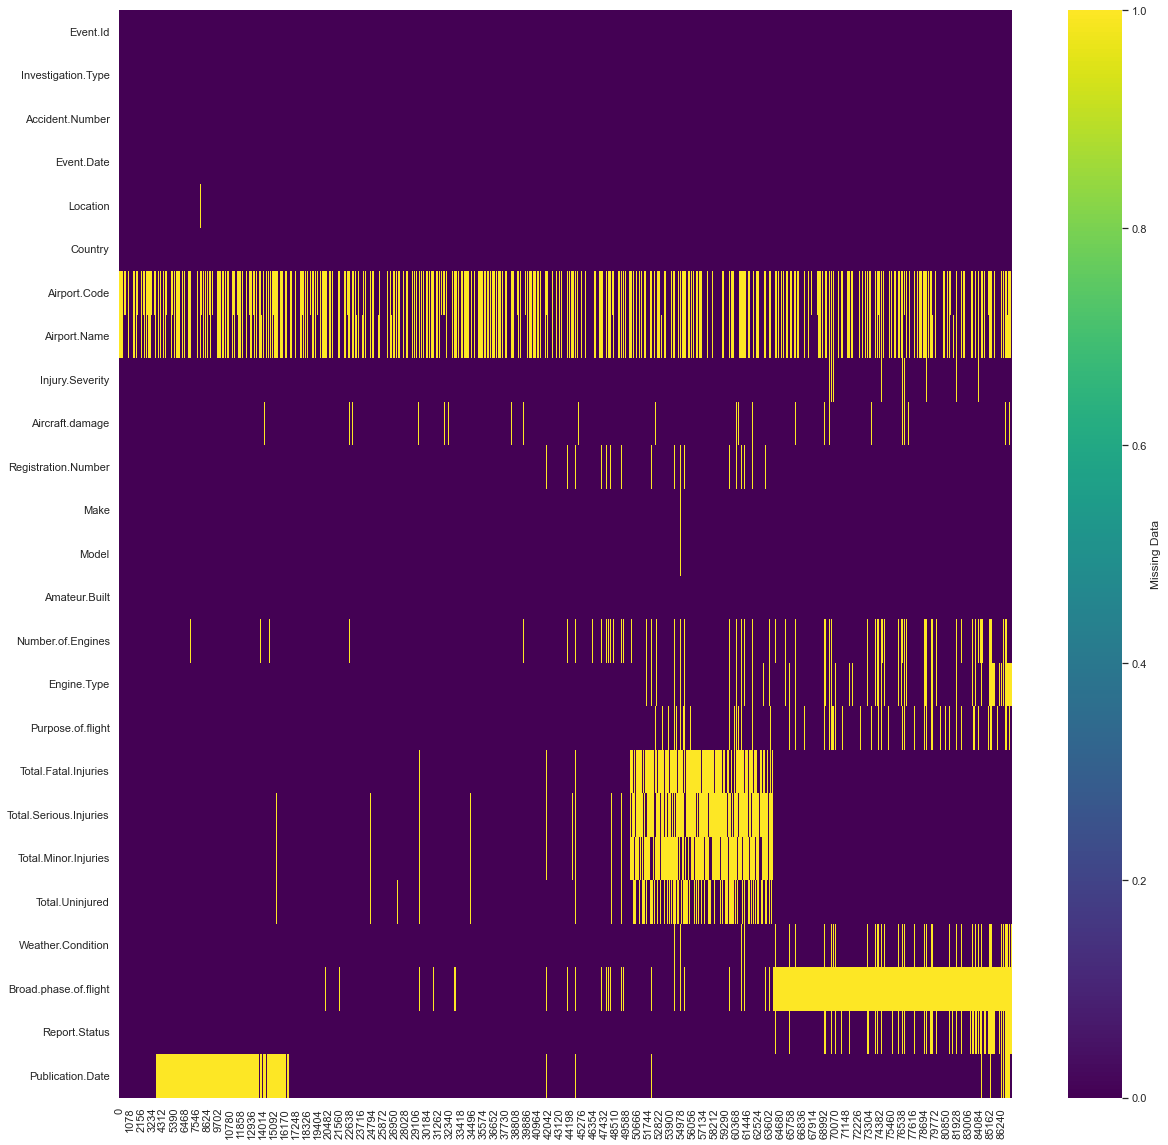

In [8]:
plt.figure(figsize=(20,20))
sb.heatmap(plane.isna().transpose(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})

Better than before! Now let's dive into the hot part! This will be a very long cleaning process. But bear with me :D!

I want to make a function to view the missing percentage of the dataframe because we will use it quite often.

In [9]:
def percentmissing(data):
    u = data.isnull().sum()
    percentage_missing = u*100/data.shape[0]
    rows_missing = u
    percentage_missing_df = pd.DataFrame({'Missing Percentage (%)': percentage_missing, 'Rows Missing' : rows_missing})
    return percentage_missing_df

Sweet! Let's test it!

In [10]:
percentmissing(plane)

,Missing Percentage (%),Rows Missing
Event.Id,0.000000,0
Investigation.Type,0.000000,0
Accident.Number,0.000000,0
Event.Date,0.000000,0
Location,0.059577,52
Country,0.258931,226
Airport.Code,43.491212,37960
Airport.Name,40.474554,35327
Injury.Severity,1.011663,883
Aircraft.damage,3.448592,3010


Great! It shows each columns of the dataframe, complete with each NaN percentages and rows. This is helpful for us to track the NaN percentages as we are cleaning the data. Remember the consideration that I said at the beginning of the notebook? It is easier to see whether the NaN values in a certain column need to be dropped or re-labelled, because we can see the exact numbers of these NaN values rather than to see the visualization. Nevertheless, I think both dataframe and heatmap are equally useful, the difference is at the usage and the what each offers.

Let's see the Country first. We can use value_counts() to see the Country unique values and sort_index() to view it alphabetically.

In [11]:
Country = plane['Country'].value_counts().sort_index()

In [12]:
print(Country.to_string())

ATLANTIC OCEAN                         81
AY                                      1
Afghanistan                            14
Albania                                 1
Algeria                                 2
American Samoa                          6
Angola                                 11
Anguilla                                1
Antarctica                              7
Antigua And Barbuda                     2
Antigua and Barbuda                     3
Argentina                             103
Aruba                                   2
Australia                             297
Austria                                56
BLOCK 651A                              1
Bahamas                               212
Bahrain                                 7
Bangladesh                              8
Barbados                                6
Belarus                                 1
Belgium                                37
Belize                                  9
Benin                             

Aha! My fear came true! There are some data that are labeled as 'UN' and 'Unknown'. They are all different, but I am sure they have the same meaning (Unknown). Don't forget that NaN values at this column may also mean 'Unknown'. We have to relabelled it. Oh well! :(

Let's skim one of the example a little

In [13]:
unknown_crash = plane[plane['Country']=="Unknown"]

In [14]:
unknown_crash

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
63009,20081219X65340,Incident,ENG07WA040,2007-07-23,"Indian Ocean, Unknown",Unknown,NaN,NaN,Incident,NaN,...,Turbo Fan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,19-05-2010
63709,20121004X53806,Incident,ERA13IA006,2007-11-09,NaN,Unknown,NaN,NaN,Incident,NaN,...,Turbo Prop,Public Aircraft - Federal,NaN,NaN,NaN,6.0,IMC,Maneuvering,Probable Cause,30-05-2013
73390,20130514X13118,Accident,DCA13WA089,2013-04-07,"Unkown, Unkown",Unknown,NaN,NaN,Fatal,Destroyed,...,NaN,Positioning,1.0,0.0,0.0,0.0,NaN,NaN,NaN,25-09-2020


Okay, seems normal. Not to worry, we can replace and fill this NaN values using fillna() and replace() command.

Here is some detail if you want further explanation:

[fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) and
[replace()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

Let's work on it! Fill the NaN values with UNKNOWN and replace the similar values into UNKNOWN.

Note: For Unknown values, I will convert everything to UNKNOWN. This will be applied to every columns

In [15]:
plane['Country'].fillna("UNKNOWN",inplace=True)
plane['Country'].replace({'Unknown':'UNKNOWN'}, inplace=True)
plane['Country'].replace({'UN':'UNKNOWN'}, inplace=True)

From the percentagemissing function, missing values of plane['Country'] are 226. There are 13 UNKNOWN value with label UN and 3 UNKNOWN values with label Unknown. If our calculation and cleaning are right, there should be 242 UNKNOWN values in plane['Country']

In [16]:
unknown_crash = plane[plane['Country']=="UNKNOWN"]
unknown_crash

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
36,20020917X02410,Accident,MIA82FKA05,1982-01-04,SAINT CROIX,UNKNOWN,STX,ALEXANDER HAMILTON,Fatal(1),Destroyed,...,Reciprocating,Business,1.0,0.0,1.0,0.0,VMC,Taxi,Probable Cause,04-01-1983
464,20020917X02358,Accident,MIA82DA062,1982-03-02,HUMA CAO,UNKNOWN,NaN,NaN,Fatal(1),Destroyed,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,Descent,Probable Cause,02-03-1983
465,20020917X02026,Accident,FTW82DA076,1982-03-02,MUSTANG BLK A11,UNKNOWN,NaN,NaN,Non-Fatal,NaN,...,Turbo Shaft,Unknown,0.0,1.0,0.0,5.0,VMC,Standing,Probable Cause,02-03-1983
725,20020917X02377,Accident,MIA82DA091,1982-03-31,MOCA,UNKNOWN,PR05,LABADIE,Non-Fatal,Substantial,...,Reciprocating,Unknown,0.0,0.0,0.0,1.0,UNK,Landing,Probable Cause,31-03-1983
831,20020917X02069,Accident,FTW82DA127,1982-04-13,WEST DELTA 105D,UNKNOWN,NaN,NaN,Non-Fatal,Destroyed,...,Turbo Shaft,Ferry,0.0,0.0,1.0,0.0,VMC,Takeoff,Probable Cause,13-04-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78092,20160415X63104,Accident,ERA16LA158,2016-04-15,"Atlantic Ocean, AO",UNKNOWN,NaN,NaN,Non-Fatal,Substantial,...,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,NaN,A total loss of engine power for reason(s) tha...,25-09-2020
78752,20160817X93540,Incident,ENG16WA032,2016-08-07,"Over the Pacific, PO",UNKNOWN,GUM,GUAM INTL,Non-Fatal,NaN,...,Turbo Fan,NaN,0.0,0.0,0.0,320.0,NaN,NaN,NaN,25-09-2020
78874,20160908X11147,Accident,DCA16CA220,2016-08-31,"International Waters, UN",UNKNOWN,NaN,NaN,Non-Fatal,NaN,...,Turbo Fan,NaN,0.0,11.0,1.0,0.0,VMC,NaN,an inadvertent encounter with severe convectiv...,25-09-2020
79416,20170414X90203,Accident,DCA17WA094,2017-01-07,"Arabian Sea, UN",UNKNOWN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,25-09-2020


Yes! Our calculation was right! Now let's move to the next column!

Let's view Make and Model:

In [17]:
makemodel= plane[['Make','Model']]
makemodel

,Make,Model
0,Stinson,108-3
1,Piper,PA24-180
2,Cessna,172M
3,Rockwell,112
4,Cessna,501
...,...,...
87277,CIRRUS DESIGN CORP,SR22
87278,CESSNA,172N
87279,CESSNA,172E
87280,CESSNA,207


In [18]:
make = plane['Make'].value_counts().sort_index()
print(make.to_string())

107.5 Flying Corporation              1
1200                                  1
177MF LLC                             1
1977 Colfer-chan                      1
1st Ftr Gp                            1
2000 Mccoy                            1
2001 Mcgirl                           1
2003 Nash                             1
2007 Savage Air LLC                   1
3XTRIM                                1
67 Flying Dutchman                    1
777                                   1
781569 INC                            1
85 Manista                            1
A Pair Of Jacks                       1
A. H. Gettings                        1
A. Le Francois                        1
A. Schleicher GMBH & Co.              1
AARDEMA ROBERT JOHN                   1
AB SPORTINE AVIACIJA                  3
AB Sportine Aviacija                  1
ABBETT GERRY                          1
ABBEY VICTOR                          1
ACKLAND JEFFREY DEAN                  1
ACRO                                  1


In [19]:
model = plane['Model'].value_counts().sort_index()
print(model.to_string())

&GCBC                      1
(EX) RV-6                  1
(MODIFIED)                 1
(SOLOY CONVERSION)         1
-269C                      1
-737-222                   1
0-1A                       1
0-47B                      1
0-58A                      1
0-58B                      5
0-77                       4
001                        1
01                         3
058B                       1
084                        1
1                         14
1 AARDEMA RAG WNG SP       1
1-11                       1
1-11-204AF                 1
1-11/204/AF                1
1-126E                     1
1-23                       1
1-24                       1
1-26                       1
1-26B                      2
1-26D                      1
1-26E                      4
1-35                       1
1-35C                      2
1-36                       3
1-A                        3
1.131 JUNGMANN             1
1.131E                     1
10                         2
10 GXE        

In [20]:
model = plane['Model'].value_counts().sort_index()
print(model.to_string())

&GCBC                      1
(EX) RV-6                  1
(MODIFIED)                 1
(SOLOY CONVERSION)         1
-269C                      1
-737-222                   1
0-1A                       1
0-47B                      1
0-58A                      1
0-58B                      5
0-77                       4
001                        1
01                         3
058B                       1
084                        1
1                         14
1 AARDEMA RAG WNG SP       1
1-11                       1
1-11-204AF                 1
1-11/204/AF                1
1-126E                     1
1-23                       1
1-24                       1
1-26                       1
1-26B                      2
1-26D                      1
1-26E                      4
1-35                       1
1-35C                      2
1-36                       3
1-A                        3
1.131 JUNGMANN             1
1.131E                     1
10                         2
10 GXE        

Let's clean it:

In [21]:
plane['Model'].fillna("UNKNOWN",inplace=True)
plane['Make'].fillna("UNKNOWN",inplace=True)
plane['Model'].replace({'UNK':'UNKNOWN','Unknown':'UNKNOWN','Unkown':'UNKNOWN'}, inplace=True)
plane['Make'].replace({'Unknown':'UNKNOWN','UNKNOWN':'UNKNOWN','UNknown':'UNKNOWN'}, inplace=True)

The next one is Aircraft damage:

In [22]:
plane['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [23]:
plane['Aircraft.damage'].replace({'Unknown':'UNKNOWN'}, inplace=True)
plane['Aircraft.damage'].fillna("UNKNOWN",inplace=True)

In [24]:
plane['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', 'UNKNOWN'], dtype=object)

We are moving to Injury Severity:

In [25]:
plane['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [26]:
plane['Injury.Severity'].replace({'Unavailable':'UNKNOWN'}, inplace=True)
plane['Injury.Severity'].fillna("UNKNOWN",inplace=True)

Because this column has a lot of unique values, I want to make sure that we aren't skipping anything. Let's re-do the comment to check:

In [27]:
plane['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'UNKNOWN', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal(80)

Hmmm, the Non-Fatal and the Incident one seems weird to me. Let's see whether it's significant or not in the first place:

In [28]:
plane[plane['Injury.Severity']=='Non-Fatal'].shape

(66561, 25)

In [29]:
plane[plane['Injury.Severity']=='Incident'].shape

(2219, 25)

Hmmm, I would assume that Non-Fatal here means that the crash is not really fatal. But what about the incident one? I want to compare first with the Investigation Type:

In [30]:
plane['Investigation.Type'].unique()

array(['Accident', 'Incident'], dtype=object)

Alright, there is also incident at this column. It makes me wonder whether every Incident in Injury.Severity are Incident in Investigation.Type too, or is there any separate data? Let's check it:

In [31]:
plane[(plane['Investigation.Type']=='Incident') & (plane['Injury.Severity']=='Incident')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
23,20020917X02333,Incident,LAX82IA034,1982-01-03,"VAN NUYS, CA",United States,VNY,VAN NUYS,Incident,Minor,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,03-01-1983
40,20020917X01764,Incident,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,NaN,NaN,Incident,Minor,...,Reciprocating,Business,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,05-01-1983
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,ORD,CHICAGO O'HARE INTER'L,Incident,UNKNOWN,...,Turbo Fan,Unknown,0.0,0.0,0.0,149.0,UNK,Cruise,Probable Cause,12-01-1983
80,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,CKB,BENEDUM,Incident,Minor,...,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC,Taxi,Probable Cause,12-01-1983
119,20020917X01766,Incident,ATL82IA038,1982-01-19,"WASHINGTON, DC",United States,IAD,NaN,Incident,Minor,...,Turbo Prop,Ferry,0.0,0.0,0.0,1.0,IMC,Descent,Probable Cause,19-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63857,20080116X00059,Incident,ANC08IA026,2007-12-17,"Aniak, AK",United States,PANI,Aniak,Incident,UNKNOWN,...,Turbo Prop,NaN,NaN,NaN,1.0,1.0,VMC,Takeoff,Probable Cause,30-07-2008
63887,20080321X00351,Incident,NYC08IA069,2007-12-24,"Destin, FL",United States,NaN,NaN,Incident,Minor,...,Reciprocating,Instructional,NaN,NaN,NaN,2.0,VMC,Climb,Probable Cause,03-03-2010
63896,20071231X02008,Incident,DEN08IA044,2007-12-26,"Aspen, CO",United States,ASE,Aspen/Pitkin County,Incident,Minor,...,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,Climb,Probable Cause,24-12-2008
63897,20080128X00107,Incident,OPS08IA004B,2007-12-27,"Teterboro, NJ",United States,NaN,NaN,Incident,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,2.0,VMC,Taxi,Probable Cause,31-03-2008


Aha! Every Incident in Injury.Severity are classified as Incident in Investigation.Type since they have the same number of rows (2219). I will leave it as it is.

Let's check the heatmap again to see our progress:

<AxesSubplot:>

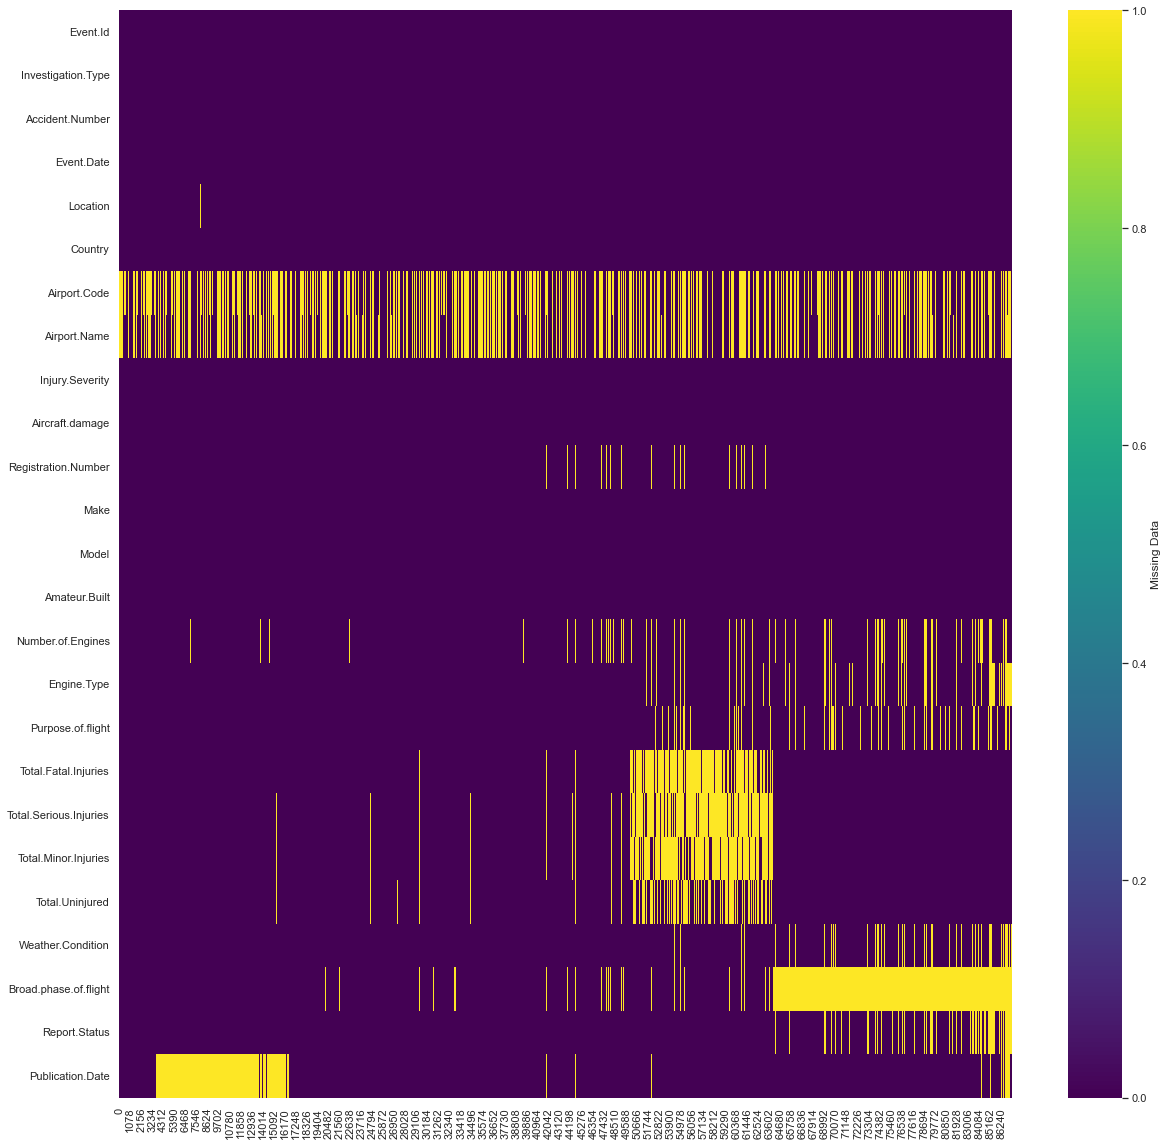

In [32]:
plt.figure(figsize=(20,20))
sb.heatmap(plane.isna().transpose(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})

Much better! Now let's move to Location. Location, show me what you have!

In [33]:
plane['Location'].unique()

array(['MOOSE CREEK, ID', 'BRIDGEPORT, CA', 'Saltville, VA', ...,
       'Auxerre, OF', 'Hardy, AR', 'La Aurora, OF'], dtype=object)

Hmmm, I see there is ,..., there. Not a good sign I guess

In [34]:
plane['Location'].nunique()

27171

Yeap, not a good sign! There are 27171 different locations of our data. But I would expect that since our data is big and the locations are differs by city/county, making it harder to skim. That's okay. Let's skim through it anyway.

In [35]:
plane['Location'].value_counts().sort_index().head(n=20)

(N) SKWENTNA, AK       1
,                      3
, AO                   3
, Austria              1
, Gabon                1
, Greece               1
, Hungary              1
, Ireland              1
, Las Americas         1
0WASSO, OK             1
1 1/2 MI.N. MAY, KS    1
1/4NM S. OF PEO, OR    1
10 EAST OF TILL, OR    1
10 M.N. OF GILR, CA    1
10 NM E. OF KEN, ID    1
10 NM W LEE VIN, CA    1
10 SW FALLS CIT, NE    1
10 SW OF MILAN, MO     1
10 WEST OF BIGG, CA    1
100MI S.KNG SLM, AK    1
Name: Location, dtype: int64

Let's see the ',' Location and change it. Don't forget to fill the NaN values with UNKNOWN!

In [36]:
plane[plane['Location']==',']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
65998,20090306X84920,Incident,DCA09WA036,2009-02-27,",",United States,NaN,NaN,Non-Fatal,UNKNOWN,...,NaN,NaN,0.0,0.0,0.0,131.0,NaN,NaN,.,03-11-2020
68733,20100816X94947,Accident,ERA10LA426,2010-08-15,",",United States,NaN,NaN,Non-Fatal,Substantial,...,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,NaN,A total loss of engine power for undetermined ...,25-09-2020
71633,20120419X51642,Accident,ERA12LA290,2012-04-19,",",United States,NaN,NaN,Fatal,Substantial,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,NaN,"Pilot incapacitation, which resulted in the pi...",25-09-2020


For the location, I notice that there are two locations separated by ', '. We can separate it using lambda split function, but before that, I want to fill the UNKNOWN value with 'UNKNOWN, UNKNOWN' so that I don't have to make fillna() command multiple times

In [37]:
plane['Location'].replace({',':'UNKNOWN, UNKNOWN'}, inplace=True)
plane['Location'].fillna("UNKNOWN, UNKNOWN",inplace=True)

Great! Let's separate it and create a new columns for this split. I will call it 'Location1st' and 'Location2nd'

In [38]:
plane['Location1st'] = plane['Location'].apply(lambda x: x.split(', ')[0])
plane['Location2nd'] = plane['Location'].apply(lambda x: x.split(', ')[-1])

Let's view it!

In [39]:
plane

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,MOOSE CREEK,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,BRIDGEPORT,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,EUREKA,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,Canton,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,20211223104439,Accident,GAA22WA054,2021-12-21,"Auxerre, OF",United States,NaN,NaN,Fatal,Destroyed,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Auxerre,OF
87278,20211228104450,Accident,WPR22LA069,2021-12-22,"Auburn, CA",United States,NaN,NaN,Non-Fatal,UNKNOWN,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Auburn,CA
87279,20211227104443,Accident,CEN22FA082,2021-12-26,"Hardy, AR",United States,NaN,NaN,Fatal,UNKNOWN,...,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Hardy,AR
87280,20211230104454,Accident,ERA22LA097,2021-12-29,"Marathon, FL",United States,NaN,NaN,Non-Fatal,UNKNOWN,...,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,Marathon,FL


Let's check if there is any NaN values in both columns:

In [40]:
plane['Location1st'].isnull().sum()

0

In [41]:
plane['Location2nd'].isnull().sum()

0

In [42]:
plane[plane['Location1st'] == 'UNKNOWN'].shape

(64, 27)

In [43]:
plane[plane['Location2nd'] == 'UNKNOWN'].shape

(56, 27)

In [44]:
plane[(plane['Location1st'] == 'UNKNOWN')&(plane['Location2nd'] == 'UNKNOWN')].shape

(56, 27)

Seems good. We can drop the Location since we don't need it anymore

In [45]:
plane.drop(columns=['Location'],axis=1,inplace=True)

Let's check if we have any data that doesn't have both locations and country. We will drop this since this is not important for our data

In [46]:
plane[(plane['Location1st']=='UNKNOWN')&(plane['Country']=='UNKNOWN')&(plane['Location2nd']=='UNKNOWN')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd
19612,20001213X25117,Accident,MIA88LA104,1988-02-07,UNKNOWN,NaN,NaN,Fatal(2),Destroyed,N884G,...,2.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,30-11-2007,UNKNOWN,UNKNOWN
38569,20001207X04783,Accident,NYC96WA018,1995-10-24,UNKNOWN,NaN,NaN,Fatal(1),Substantial,N4733K,...,1.0,0.0,0.0,0.0,UNK,NaN,Foreign,01-12-1995,UNKNOWN,UNKNOWN
63709,20121004X53806,Incident,ERA13IA006,2007-11-09,UNKNOWN,NaN,NaN,Incident,UNKNOWN,N42RF,...,NaN,NaN,NaN,6.0,IMC,Maneuvering,Probable Cause,30-05-2013,UNKNOWN,UNKNOWN


We will drop these index

In [47]:
plane.drop([19612,38569,63709],inplace=True)

I remember on the Locations, there are sole values that are similar with UNKNOWN. We will fix this if there is any:

In [48]:
plane['Location2nd'].unique()

array(['ID', 'CA', 'VA', 'OH', 'MA', 'MN', 'WA', 'NJ', 'FL', 'NM', 'AL',
       'LA', 'TX', 'OK', 'AR', 'UT', 'AK', 'PA', 'MI', 'GA', 'NC', 'NY',
       'MT', 'OR', 'NV', 'IN', 'SAINT CROIX', 'AZ', 'MO', 'WY', 'IL',
       'SC', 'MD', 'HI', 'CO', 'WV', 'MS', 'DC', 'VT', 'KS', 'NH', 'IA',
       'WI', 'KY', 'CT', 'GULF OF MEXICO', 'TN', 'ME', 'SAN JUAN', 'SD',
       'NE', 'RI', 'ND', 'ATLANTIC OCEAN', 'HIGH ISLAND BLK', 'HUMA CAO',
       'MUSTANG BLK A11', 'MOCA', 'WEST DELTA 105D', 'HIGH ISLAND 389',
       'WEST CAMERON #4', 'ARECIBO', 'DE', 'Bahamas', 'CHARLOTTE AMALI',
       'MISSING ACFT', 'NEAR ST. CROIX', 'BAHAMAS', 'BUCCANEER OIL F',
       'NEAR RAMEY', 'CULEBRA', 'GRAND ISLE B43Q', 'PATILLAS',
       'E. CAMERON', 'SHIPSHOAL 295', 'LAJAS', 'HIGH ISLAND', 'UNKNOWN',
       'CABO ROJO', 'HIGH ISLAND 582', 'EUGENE ISL.BLK', 'VIEQUES',
       'EUGENE ISLAND', 'GRAND ISLE BLK', 'ST. THOMAS', 'MANATI',
       'Angola', 'DORADO', 'QUEBRADILLAS', 'GREEN CANYON172',
       'STAKE IS

In [49]:
plane['Location2nd'].replace({'Unknown':'UNKNOWN', 'Unknown,':'UNKNOWN'}, inplace=True)

In [50]:
plane[plane['Location1st'].apply(lambda x : x[0:2]) == 'Un']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd
49987,20010221X00482,Accident,ANC01FA033,2001-01-23,United States,PADU,UNALASKA,Fatal(2),Destroyed,N19454,...,2.0,NaN,NaN,NaN,VMC,Climb,Probable Cause,24-10-2002,Unalaska,AK
51557,20011015X02088,Accident,MIA02FAMS1,2001-10-01,UNKNOWN,NaN,NaN,Fatal(1),Destroyed,N3101G,...,1.0,NaN,NaN,NaN,VMC,Unknown,Probable Cause,26-08-2002,Unknown,UNKNOWN
51653,20011022X02129,Accident,CHI02FA006,2001-10-20,United States,NaN,NaN,Fatal(1),Destroyed,N6609G,...,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,24-10-2002,Union,IL
53847,20021213X05606,Accident,LAX03FA037,2002-11-24,United States,PAO,Palo Alto,Fatal(1),Destroyed,N3242Q,...,1.0,NaN,NaN,NaN,IMC,Approach,Probable Cause,27-10-2005,Union City,CA
55433,20030905X01478,Accident,CHI03FA291,2003-09-01,United States,FWA,FORT WAYNE INTERNATIONAL,Fatal(3),Destroyed,N8018J,...,3.0,1.0,1.0,NaN,IMC,Go-around,Probable Cause,24-01-2005,Uniondale,IN
58607,20050523X00653,Incident,NYC05MA083,2005-05-12,United States,NaN,NaN,Incident,UNKNOWN,N910ME,...,0.0,0.0,0.0,80.0,IMC,Climb,Probable Cause,14-01-2009,Union Star,MO
59683,20051017X01659,Accident,CHI06LA005,2005-10-09,United States,NaN,NaN,Fatal(1),Destroyed,N6085R,...,1.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,31-01-2007,Union City,OH
63304,20070910X01345,Accident,CHI07LA288,2007-09-02,United States,NaN,NaN,Fatal(1),Destroyed,N1502V,...,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,30-07-2008,Union Star,MO
64315,20080414X00473,Accident,ANC08FA050,2008-04-10,United States,PADU,Unalaska Airport,Non-Fatal,Substantial,N741,...,0.0,8.0,1.0,0.0,VMC,NaN,The pilot's failure to maintain clearance from...,25-09-2020,Unalaska,AK
65902,20090202X02717,Accident,CEN09CA148,2009-02-01,United States,4C1,Flying U Ranch,Non-Fatal,Substantial,N53576,...,0.0,0.0,0.0,2.0,VMC,NaN,The certificated flight instructor's failure t...,25-09-2020,Union Mills,IN


In [51]:
plane[plane['Location1st'].apply(lambda x : x[0:4]) == 'UNKN']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd
4239,20001214X42513,Accident,LAX83LAMS4,1983-03-29,United States,NaN,NaN,Fatal(1),Destroyed,N6329M,...,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,NaN,UNKNOWN,UNKNOWN
5726,20001214X44103,Accident,DCA83RA001,1983-08-04,Pakistan,NaN,NaN,Non-Fatal,Substantial,N738PA,...,0.0,0.0,0.0,245.0,UNK,NaN,Foreign,06-02-1995,UNKNOWN,UNKNOWN
6467,20001214X44909,Accident,MIA84LA007,1983-10-04,United States,NaN,NaN,Fatal(3),Destroyed,N2284R,...,3.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,NaN,UNKNOWN,FL
7948,20001214X39337,Incident,MIA84IA140,1984-04-14,Martinique,NaN,NaN,Incident,Minor,N751PA,...,0.0,0.0,0.0,263.0,VMC,Climb,Probable Cause,NaN,UNKNOWN,UNKNOWN
8449,20001214X40019,Accident,LAX84LAMS3,1984-06-01,United States,NaN,NaN,Fatal(1),Destroyed,N6602V,...,1.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,NaN,UNKNOWN,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61431,20060922X01377,Incident,DCA06WA074,2006-09-17,Iceland,NaN,NaN,Incident,Minor,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,22-09-2006,UNKNOWN,UNKNOWN
62438,20070518X00583,Incident,DCA07WA044,2007-04-29,Brazil,NaN,NaN,Incident,UNKNOWN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,18-05-2007,UNKNOWN,UNKNOWN
65998,20090306X84920,Incident,DCA09WA036,2009-02-27,United States,NaN,NaN,Non-Fatal,UNKNOWN,PK-YTX,...,0.0,0.0,0.0,131.0,NaN,NaN,.,03-11-2020,UNKNOWN,UNKNOWN
68733,20100816X94947,Accident,ERA10LA426,2010-08-15,United States,NaN,NaN,Non-Fatal,Substantial,N44WH,...,0.0,1.0,0.0,0.0,VMC,NaN,A total loss of engine power for undetermined ...,25-09-2020,UNKNOWN,UNKNOWN


In [52]:
plane['Location1st'].replace({'Unknown':'UNKNOWN', 'Unknown,':'UNKNOWN'}, inplace=True)

Finally, we are done with Location! Let's move to Country:

In [53]:
plane['Country'].unique()

array(['United States', 'UNKNOWN', 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
    

From the list above, it can be seen that there are two Korea: "Korea, Republic Of" and "South Korea". However, they are the same Korea. We can replace one of them (I will choose "Korea, Republic Of").

In [54]:
plane['Country'].replace({'South Korea':'Korea, Republic Of'}, inplace=True)

In [55]:
plane['Country'].unique()

array(['United States', 'UNKNOWN', 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
    

Good. Seems like there is not any issues. However, we should deal with 'MISSING' part. Let's look up at the data first.

In [56]:
plane[plane['Country']=='MISSING']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd
2912,20020917X04922,Accident,MIA83LA009,1982-09-28,MISSING,2,NaN,Fatal(2),Substantial,N5999,...,2.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,28-09-1983,MISSING ACFT,MISSING ACFT
3094,20020917X04906,Accident,MIA83FA017,1982-10-20,MISSING,NaN,NaN,Fatal(8),Destroyed,N777AA,...,8.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,20-10-1983,MISSING ACFT,MISSING ACFT
9646,20001214X41097,Accident,FTW84LAMS5,1984-09-02,MISSING,NaN,NaN,Fatal(1),Destroyed,N93480,...,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,NaN,MISSING ACFT,MISSING ACFT
11599,20001214X36536,Accident,MIA85LA176,1985-05-08,MISSING,NaN,NaN,Fatal(1),Destroyed,N9465M,...,1.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,NaN,MISSING ACFT,MISSING ACFT
13017,20001214X37800,Accident,FTW85LAMS2,1985-09-17,MISSING,NaN,NaN,Fatal(1),Destroyed,N3RB,...,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,NaN,MISSING,MISSING
16899,20001213X30259,Accident,LAX87FAMS2,1987-02-24,MISSING,NaN,NaN,Fatal(2),Destroyed,N8307H,...,2.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,31-03-1989,MISSING ACFT,MISSING ACFT
19368,20001213X32748,Accident,MIA88LA073,1987-12-21,MISSING,NaN,NaN,Fatal(1),Destroyed,N757EQ,...,1.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,24-02-1989,MISSING,MISSING
20108,20001213X25409,Accident,ATL89FAMS2,1988-04-17,MISSING,50J,BERKLEY COUNTY,Fatal(1),Destroyed,N98070,...,1.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,07-10-1992,MISSING,MISSING
22032,20001213X27402,Accident,DCA89LA012,1988-12-09,MISSING,NaN,NaN,Fatal(1),Destroyed,N296MA,...,1.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,29-07-1992,MISSING,MISSING
22334,20001213X27776,Accident,MIA89LAMS1,1989-02-06,MISSING,NaN,NaN,Fatal(1),Destroyed,N6834J,...,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,12-03-1990,MISSING ACFT,MISSING ACFT


Looks like it's all good. However, when I see Location1st and Location2nd, there are MISSING and MISSING ACFT. Let's look at those:

In [57]:
plane[plane['Location1st']=='MISSING']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd
13017,20001214X37800,Accident,FTW85LAMS2,1985-09-17,MISSING,NaN,NaN,Fatal(1),Destroyed,N3RB,...,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,NaN,MISSING,MISSING
17505,20001213X30988,Accident,MIA87LA161,1987-05-14,United States,NaN,NaN,Fatal(2),Destroyed,N640CC,...,2.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,09-05-1988,MISSING,FL
19368,20001213X32748,Accident,MIA88LA073,1987-12-21,MISSING,NaN,NaN,Fatal(1),Destroyed,N757EQ,...,1.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,24-02-1989,MISSING,MISSING
20108,20001213X25409,Accident,ATL89FAMS2,1988-04-17,MISSING,50J,BERKLEY COUNTY,Fatal(1),Destroyed,N98070,...,1.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,07-10-1992,MISSING,MISSING
21686,20001213X27125,Accident,MIA89WA009,1988-10-14,Bahamas,NaN,NaN,Fatal(1),Destroyed,N8JM,...,1.0,0.0,0.0,0.0,VMC,NaN,Foreign,06-02-1995,MISSING,Bahamas
22032,20001213X27402,Accident,DCA89LA012,1988-12-09,MISSING,NaN,NaN,Fatal(1),Destroyed,N296MA,...,1.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,29-07-1992,MISSING,MISSING
22498,20001213X27984,Accident,NYC89FAMS2,1989-03-08,MISSING,NaN,NaN,Fatal(1),Destroyed,N5899F,...,1.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,30-09-1991,MISSING,MISSING
23925,20001213X29490,Accident,SEA89FAMS2,1989-09-01,United States,NaN,NaN,Fatal(1),Destroyed,N62JE,...,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,25-06-1992,MISSING,ID
24805,20001212X22462,Accident,MIA90LA061,1990-01-24,United States,NaN,NaN,Fatal(2),Destroyed,N4802B,...,2.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,30-09-1991,MISSING,FL
27239,20001212X16261,Accident,ATL91FAMS1,1991-01-07,MISSING,NaN,NaN,Fatal(2),Destroyed,N2165Y,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,17-11-1992,MISSING,MISSING


In [58]:
plane[plane['Location2nd']=='MISSING ACFT']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd
2912,20020917X04922,Accident,MIA83LA009,1982-09-28,MISSING,2,NaN,Fatal(2),Substantial,N5999,...,2.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,28-09-1983,MISSING ACFT,MISSING ACFT
3094,20020917X04906,Accident,MIA83FA017,1982-10-20,MISSING,NaN,NaN,Fatal(8),Destroyed,N777AA,...,8.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,20-10-1983,MISSING ACFT,MISSING ACFT
9646,20001214X41097,Accident,FTW84LAMS5,1984-09-02,MISSING,NaN,NaN,Fatal(1),Destroyed,N93480,...,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,NaN,MISSING ACFT,MISSING ACFT
11599,20001214X36536,Accident,MIA85LA176,1985-05-08,MISSING,NaN,NaN,Fatal(1),Destroyed,N9465M,...,1.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,NaN,MISSING ACFT,MISSING ACFT
16899,20001213X30259,Accident,LAX87FAMS2,1987-02-24,MISSING,NaN,NaN,Fatal(2),Destroyed,N8307H,...,2.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,31-03-1989,MISSING ACFT,MISSING ACFT
22334,20001213X27776,Accident,MIA89LAMS1,1989-02-06,MISSING,NaN,NaN,Fatal(1),Destroyed,N6834J,...,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,12-03-1990,MISSING ACFT,MISSING ACFT


Let's replace the value of 'MISSING ACFT' to 'MISSING':

In [59]:
plane['Location1st'].replace({'MISSING ACFT':'MISSING'},inplace=True)
plane['Location2nd'].replace({'MISSING ACFT':'MISSING'},inplace=True)

In [60]:
plane[plane['Location1st']=='MISSING ACFT']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd


In [61]:
plane[plane['Location2nd']=='MISSING ACFT']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd


Nearly perfect. Now when I skim all the unique values of Country that do not make sense: 'AY' and 'BLOCK 651A'

Let's search the index to drop those indexes

In [62]:
plane[(plane['Country']=='AY')|(plane['Country']=='BLOCK 651A')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd
30970,20001211X15148,Accident,FTW92FA189,1992-07-26,BLOCK 651A,NONE,BLOCK 651-A,Fatal(1),Destroyed,N2072B,...,1.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,30-06-1993,BLOCK 651A,BLOCK 651A
71195,20111228X81723,Accident,DCA12CA023,2011-12-19,AY,NZPG,"Pegasus McMurdo, Antarctica",UNKNOWN,Substantial,UNREG,...,0.0,0.0,0.0,0.0,VMC,NaN,an aerodynamic stall induced by an inadvertent...,25-09-2020,McMurdo,AY


Drop those indexes

In [63]:
plane.drop([30970,71195],inplace=True)

Let's move to the next part: Broad phase of flight and weather condition. The method is still the same: search for similar one, replace and fill

In [64]:
plane['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [65]:
plane['Broad.phase.of.flight'].replace({'Unknown':'UNKNOWN'},inplace=True)
plane['Broad.phase.of.flight'].fillna("UNKNOWN",inplace=True)

In [66]:
plane['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [67]:
plane['Weather.Condition'].replace({'UNK':'UNKNOWN'},inplace=True)
plane['Weather.Condition'].replace({'Unk':'UNKNOWN'},inplace=True)
plane['Weather.Condition'].fillna("UNKNOWN",inplace=True)

Now, we'll work with the injuries:

In [68]:
tfj_na = list(plane[plane['Total.Fatal.Injuries'].isnull()].index)
plane.drop(tfj_na,inplace=True)

In [69]:
tsj_na = list(plane[plane['Total.Serious.Injuries'].isnull()].index)
plane.drop(tsj_na,inplace=True)

In [70]:
tmj_na = list(plane[plane['Total.Minor.Injuries'].isnull()].index)
plane.drop(tmj_na,inplace=True)

In [71]:
tu_na = list(plane[plane['Total.Uninjured'].isnull()].index)
plane.drop(tu_na,inplace=True)

Done with the injuries! Now let's check with the heatmap and the percentmissing function:

<AxesSubplot:>

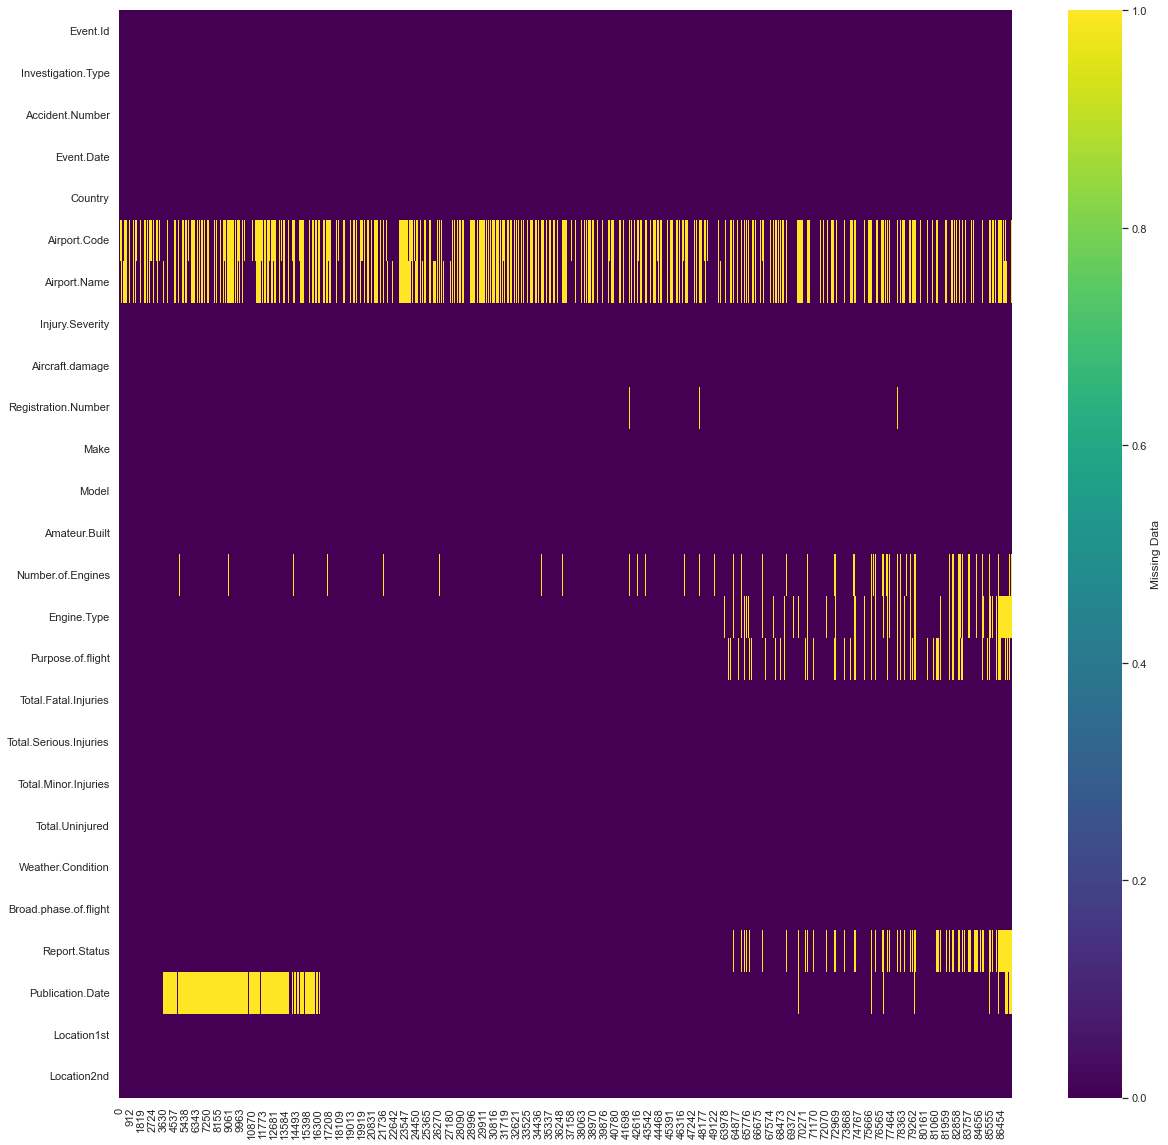

In [72]:
plt.figure(figsize=(20,20))
sb.heatmap(plane.isna().transpose(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})

In [73]:
percentmissing(plane)

,Missing Percentage (%),Rows Missing
Event.Id,0.000000,0
Investigation.Type,0.000000,0
Accident.Number,0.000000,0
Event.Date,0.000000,0
Country,0.000000,0
Airport.Code,43.953098,31975
Airport.Name,40.640293,29565
Injury.Severity,0.000000,0
Aircraft.damage,0.000000,0
Registration.Number,0.376643,274


We are halfway more done! Move to the Report Status and Registration Number

In [74]:
plane['Report.Status'].fillna("UNKNOWN",inplace=True)

In [75]:
rn_na = list(plane[plane['Registration.Number'].isna()].index)

In [76]:
plane.drop(rn_na,inplace=True) #drop since it's only 274/72731 (~0.37% of data)

Let's work with the rest of the column (non-time series)

In [77]:
plane['Number.of.Engines'].fillna("UNKNOWN", inplace=True)

In [78]:
plane["Purpose.of.flight"].unique()

array(['Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', nan, 'Other Work Use', 'Positioning',
       'Flight Test', 'Skydiving', 'Public Aircraft - Local',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - State', 'EXLD', 'BANT', 'GLDT', 'PUBU',
       'Air Race show', 'Firefighting', 'ADRP'], dtype=object)

In [79]:
plane['Purpose.of.flight'].replace({"Unknown":"UNKNOWN"},inplace=True)
plane['Purpose.of.flight'].fillna("UNKNOwN",inplace = True)

In [80]:
plane["Engine.Type"].unique()

array(['Reciprocating', 'Turbo Shaft', 'Unknown', 'Turbo Fan',
       'Turbo Prop', 'Turbo Jet', nan, 'None', 'Electric',
       'Hybrid Rocket', 'Geared Turbofan', 'LR'], dtype=object)

In [81]:
plane['Engine.Type'].replace({"Unknown":"UNKNOWN"},inplace=True)
plane['Engine.Type'].fillna("UNKNOWN",inplace = True)

In [82]:
plane['Report.Status'].fillna("UNKNOWN",inplace=True)

In [83]:
percentmissing(plane)

,Missing Percentage (%),Rows Missing
Event.Id,0.000000,0
Investigation.Type,0.000000,0
Accident.Number,0.000000,0
Event.Date,0.000000,0
Country,0.000000,0
Airport.Code,43.763281,31717
Airport.Name,40.443469,29311
Injury.Severity,0.000000,0
Aircraft.damage,0.000000,0
Registration.Number,0.000000,0


In [84]:
plane['Amateur.Built'].unique()

array(['No', 'Yes', nan, 'Y', 'N'], dtype=object)

In [85]:
plane['Amateur.Built'].replace({'No':0,'N':0,'Yes':1,'Y':1},inplace=True)
plane[plane['Amateur.Built'].isnull()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd
63297,20070927X01454,Accident,NYC07LA208B,2007-09-02,United States,7FL6,Spruce Creek Airport,Non-Fatal,Substantial,Unknown,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,24-12-2008,DAYTONA BEACH,FL


In [86]:
plane.drop(63297,inplace=True)

In [87]:
plane['Amateur.Built'].unique()

array([0., 1.])

In [88]:
plane.drop(columns=['Airport.Code','Airport.Name'],axis=1,inplace=True)

In [89]:
percentmissing(plane)

,Missing Percentage (%),Rows Missing
Event.Id,0.000000,0
Investigation.Type,0.000000,0
Accident.Number,0.000000,0
Event.Date,0.000000,0
Country,0.000000,0
Injury.Severity,0.000000,0
Aircraft.damage,0.000000,0
Registration.Number,0.000000,0
Make,0.000000,0
Model,0.000000,0


Work on the time series data

In [90]:
plane['Event.Date'] = pd.to_datetime(plane['Event.Date'], format = "%Y-%m-%d")

In [91]:
plane['Event.Date.Year'] = plane['Event.Date'].dt.year
plane['Event.Date.Month'] = plane['Event.Date'].dt.month_name().str[:3]
plane['Event.Date.Day'] = plane['Event.Date'].dt.day_name().str[:3]

In [92]:
plane

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location1st,Location2nd,Event.Date.Year,Event.Date.Month,Event.Date.Day
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,...,0.0,UNKNOWN,Cruise,Probable Cause,NaN,MOOSE CREEK,ID,1948,Oct,Sun
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,...,0.0,UNKNOWN,UNKNOWN,Probable Cause,19-09-1996,BRIDGEPORT,CA,1962,Jul,Thu
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,N1168J,Rockwell,112,...,0.0,IMC,Cruise,Probable Cause,12-09-2000,EUREKA,CA,1977,Jun,Sun
6,20001218X45446,Accident,CHI81LA106,1981-08-01,United States,Fatal(4),Destroyed,N4988E,Cessna,180,...,0.0,IMC,UNKNOWN,Probable Cause,06-11-2001,COTTON,MN,1981,Aug,Sat
7,20020909X01562,Accident,SEA82DA022,1982-01-01,United States,Non-Fatal,Substantial,N2482N,Cessna,140,...,2.0,VMC,Takeoff,Probable Cause,01-01-1982,PULLMAN,WA,1982,Jan,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,20211223104439,Accident,GAA22WA054,2021-12-21,United States,Fatal,Destroyed,N565CK,CIRRUS DESIGN CORP,SR22,...,0.0,UNKNOWN,UNKNOWN,UNKNOWN,NaN,Auxerre,OF,2021,Dec,Tue
87278,20211228104450,Accident,WPR22LA069,2021-12-22,United States,Non-Fatal,UNKNOWN,N6280F,CESSNA,172N,...,0.0,UNKNOWN,UNKNOWN,UNKNOWN,NaN,Auburn,CA,2021,Dec,Wed
87279,20211227104443,Accident,CEN22FA082,2021-12-26,United States,Fatal,UNKNOWN,N5798T,CESSNA,172E,...,0.0,UNKNOWN,UNKNOWN,UNKNOWN,NaN,Hardy,AR,2021,Dec,Sun
87280,20211230104454,Accident,ERA22LA097,2021-12-29,United States,Non-Fatal,UNKNOWN,N1596U,CESSNA,207,...,0.0,UNKNOWN,UNKNOWN,UNKNOWN,NaN,Marathon,FL,2021,Dec,Wed


In [93]:
plane['Publication.Date'].fillna("UNKNOWN", inplace=True)

In [94]:
pubdate_unknown = list(plane[plane['Publication.Date']=='UNKNOWN'].index)

In [95]:
len(pubdate_unknown)

13315

In [96]:
plane.drop(pubdate_unknown, inplace=True)

In [97]:
plane['Publication.Date'] = pd.to_datetime(plane['Publication.Date'], format = "%d-%m-%Y")

In [98]:
plane['Publication.Date'].dtype

dtype('<M8[ns]')

In [99]:
plane['Publication.Date.Year'] = plane['Publication.Date'].dt.year
plane['Publication.Date.Month'] = plane['Publication.Date'].dt.month_name().str[:3]
plane['Publication.Date.Day'] = plane['Publication.Date'].dt.day_name().str[:3]

<AxesSubplot:>

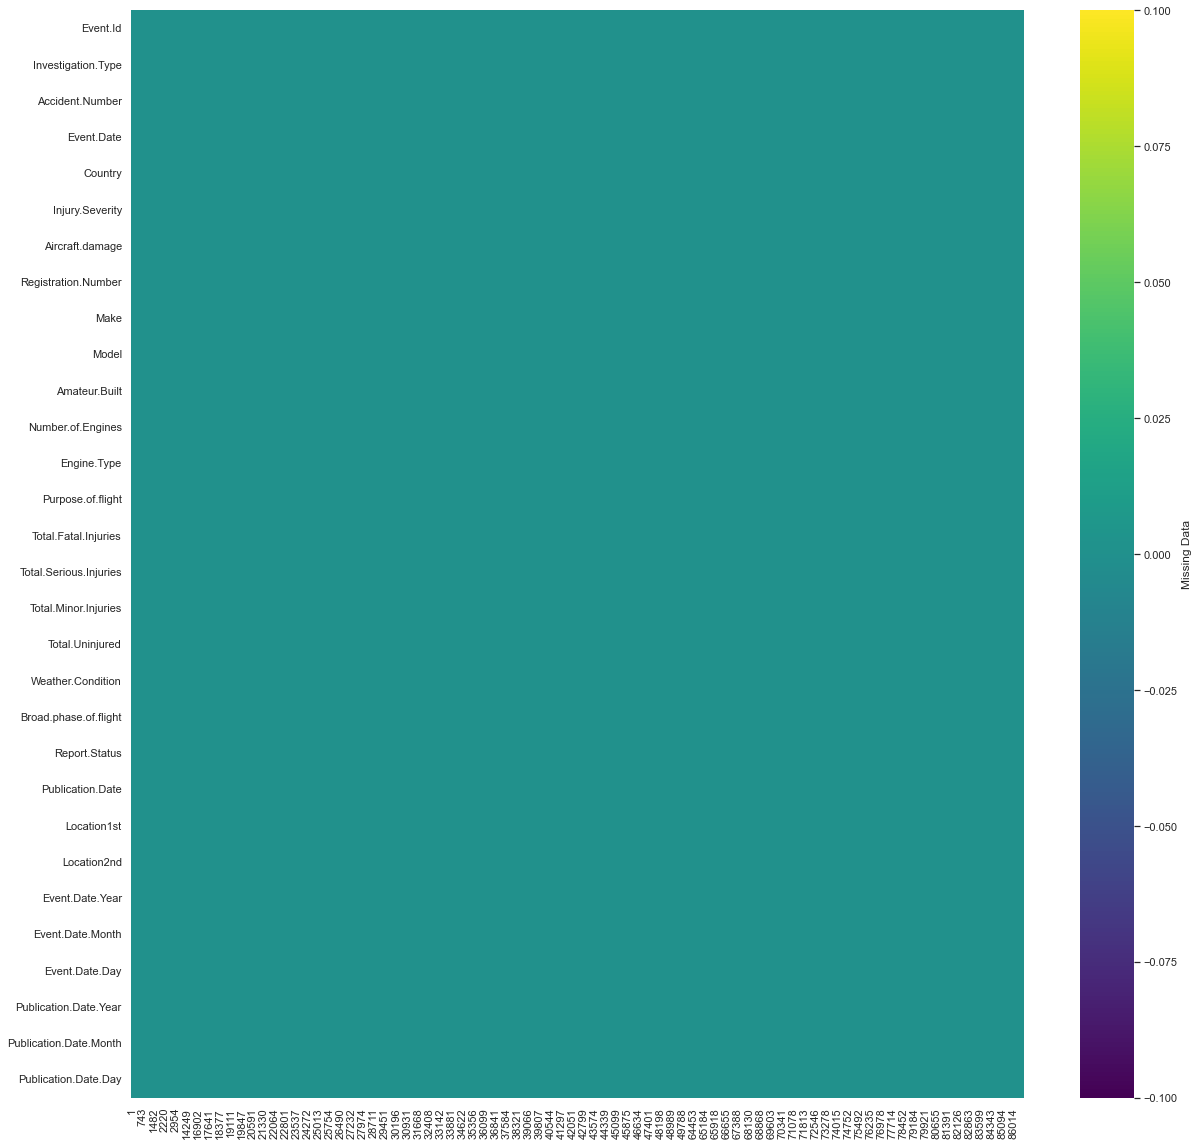

In [100]:
plt.figure(figsize=(20,20))
sb.heatmap(plane.isna().transpose(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})

In [101]:
percentmissing(plane)

,Missing Percentage (%),Rows Missing
Event.Id,0.0,0
Investigation.Type,0.0,0
Accident.Number,0.0,0
Event.Date,0.0,0
Country,0.0,0
Injury.Severity,0.0,0
Aircraft.damage,0.0,0
Registration.Number,0.0,0
Make,0.0,0
Model,0.0,0


In [102]:
plane.drop(columns=['Publication.Date'],axis=1)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,...,Broad.phase.of.flight,Report.Status,Location1st,Location2nd,Event.Date.Year,Event.Date.Month,Event.Date.Day,Publication.Date.Year,Publication.Date.Month,Publication.Date.Day
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,...,UNKNOWN,Probable Cause,BRIDGEPORT,CA,1962,Jul,Thu,1996,Sep,Thu
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,N1168J,Rockwell,112,...,Cruise,Probable Cause,EUREKA,CA,1977,Jun,Sun,2000,Sep,Tue
6,20001218X45446,Accident,CHI81LA106,1981-08-01,United States,Fatal(4),Destroyed,N4988E,Cessna,180,...,UNKNOWN,Probable Cause,COTTON,MN,1981,Aug,Sat,2001,Nov,Tue
7,20020909X01562,Accident,SEA82DA022,1982-01-01,United States,Non-Fatal,Substantial,N2482N,Cessna,140,...,Takeoff,Probable Cause,PULLMAN,WA,1982,Jan,Fri,1982,Jan,Fri
8,20020909X01561,Accident,NYC82DA015,1982-01-01,United States,Non-Fatal,Substantial,N7967Q,Cessna,401B,...,Landing,Probable Cause,EAST HANOVER,NJ,1982,Jan,Fri,1982,Jan,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87244,20211207104358,Accident,ERA22LA082,2021-12-07,United States,Non-Fatal,Substantial,N80YD,BEECH,S35,...,UNKNOWN,UNKNOWN,Tallahassee,FL,2021,Dec,Tue,2021,Dec,Thu
87245,20211208104367,Accident,ERA22FA083,2021-12-08,United States,Fatal,Destroyed,N5776B,CESSNA,182,...,UNKNOWN,UNKNOWN,Statesboro,GA,2021,Dec,Wed,2021,Dec,Tue
87249,20211209104379,Accident,CEN22FA067,2021-12-09,United States,Fatal,Destroyed,N3865K,Piper Aircraft,PA 28-140,...,UNKNOWN,UNKNOWN,Houston,TX,2021,Dec,Thu,2021,Dec,Fri
87253,20211216104413,Accident,CEN22LA076,2021-12-09,United States,Non-Fatal,Substantial,N111XJ,AVIAT AIRCRAFT INC,A-1A,...,UNKNOWN,UNKNOWN,St. Jo,TX,2021,Dec,Thu,2021,Dec,Thu


Yes! We are done with our cleaning! Let's see how big the cleaned data:

In [103]:
final_percentage = 100*plane.shape[0]/87282 #Remember our first plane's number of rows? 
final_percentage

67.77800692009808

Once we are done, we save the cleaned data into another csv file. This data can be used later for further usage. Remember that we are still at our second step of data science method which is cleaning the data. We haven't explored our data yet, but that is not our focus for this notebook.

In [104]:
plane.to_csv("plane_cleaned_131022.csv",index=False)

Aight, so we are settle down already. I choose to name the file with date so that I can track the update of the file (Too many files with the same name can slower our working and confuse us). Anyway, that is all from me for this cleaning session. Thanks and goodbye ;D


13 Oct 2022

GOL